<a href="https://colab.research.google.com/github/0017YUAN/Intro-ds/blob/main/Project_%7C_Recreating_Florence_Nightingale%E2%80%99s_Rose_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection


Importing Libraries

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
from PIL import Image
import numpy as np
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
from datetime import datetime, timedelta
#os.chdir('/content/drive/MyDrive/IntroDS/Spring2025-introDS/Student-submissions/Data')
# From personal folder
os.chdir('/content/drive/MyDrive/IntroDS/Spring2025-introDS/Student-submissions/Xiyuan Li/My Own Data')
!ls

1854-April-Black.png	  1854-September-Blue.png  1855-May-Black.png
1854-April-Blue.png	  1854-September-Red.png   1855-May-Blue.png
1854-April-Red.png	  1855-April-Black.png	   1855-May-Red.png
1854-August-Black.png	  1855-April-Blue.png	   1855-November-Black.png
1854-August-Blue.png	  1855-April-Red.png	   1855-November-Blue.png
1854-August-Red.png	  1855-August-Black.png    1855-November-Red.png
1854-December-Black.png   1855-August-Blue.png	   1855-October-Black.png
1854-December-Blue.png	  1855-August-Red.png	   1855-October-Blue.png
1854-December-Red.png	  1855-December-Black.png  1855-October-Red.png
1854-July-Black.png	  1855-December-Blue.png   1855-September-Black.png
1854-July-Blue.png	  1855-Febuary-Black.png   1855-September-Blue.png
1854-July-Red.png	  1855-Febuary-Blue.png    1855-September-Red.png
1854-June-Black.png	  1855-Febuary-Red.png	   1856-December-Red.png
1854-June-Blue.png	  1855-January-Black.png   1856-Febuary-Black.png
1854-June-Red.png	  1855-January-Blue.

In [96]:
# Function to convert data strings to datetime objects
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%b %Y")
    except ValueError:
        print(f"Could not parse date string: {date_str}")
        return None

In [100]:
#filelist = glob.glob('Group3/*')
#filelist

In [103]:
!touch file

In [104]:
png_files = [f for f in filelist if f.endswith('.png')]
len(png_files)

0

In [105]:
import re
print(re.search(r'(\s\w+\s)', "234-. udT33-4546"))

None


In [106]:
bool([None])

True

In [107]:
Group1 = glob.glob('Group1/*.PNG') + glob.glob('Group1/*.png')
Group2 = glob.glob('Group2/*.PNG') + glob.glob('Group2/*.png')
Group3 = glob.glob('Group3/*.PNG') + glob.glob('Group3/*.png')
Personal = glob.glob('*.PNG') + glob.glob('*.png') # From personal folder

In [108]:
unformatted_data_3 = []
data_dict_3 = defaultdict(list)

group_3_data = {'date': [], 'wound': [], 'disease': [], 'other': []}

for img_path in png_files:
  #png_name = img_path.split('/')[-1].replace('1885', '1855') #Convert any file from the year 1885 to 1855
  match = re.search(r'(\w+\s\d{4})\s(\w+)', png_name)
  if match:
    time, field_name = match.groups()
    mon_year = datetime.strptime(time, "%B %Y").strftime("%b %Y")
  else:
    print(f"No match found for {png_name}")
    continue

  # Open the image and convert it to a numpy array
  img = Image.open(img_path)
  img_rgb = np.array(img)

  # Count transparent pixels
  if img_rgb.shape[2] == 4:
       alpha_channel = img_rgb[:, :, 3]
       pixel_count = np.sum(alpha_channel == 0)
  else:
       print(f"Warning: Image {img_path} does not have an alpha channel.") # For blank images
       pixel_count = 0

  # data_dict_3[mon_year].append((field_name, pixel_count))
  unformatted_data_3.append((mon_year, field_name, pixel_count))

# Sorting the data by date
sorted_data_3 = sorted(unformatted_data_3, key=lambda x: parse_date(x[0]))

for entry in sorted_data_3:
    data_dict_3[entry[0]].append((entry[1], entry[2]))

for month_y, list_of_pair in data_dict_3.items():
  group_3_data['date'].append(month_y)
  temp_dict = dict(list_of_pair)
  group_3_data['disease'].append(temp_dict.get('Blue', 0))
  group_3_data['other'].append(temp_dict.get('Black', 0))
  group_3_data['wound'].append(temp_dict.get('Red', 0))

print(len(group_3_data['date']))
print(len(group_3_data['disease']))
print(len(group_3_data['wound']))
print(len(group_3_data['other']))

print(group_3_data)

0
0
0
0
{'date': [], 'wound': [], 'disease': [], 'other': []}


# Visualization


**Historical Recreation**

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of labels (12).

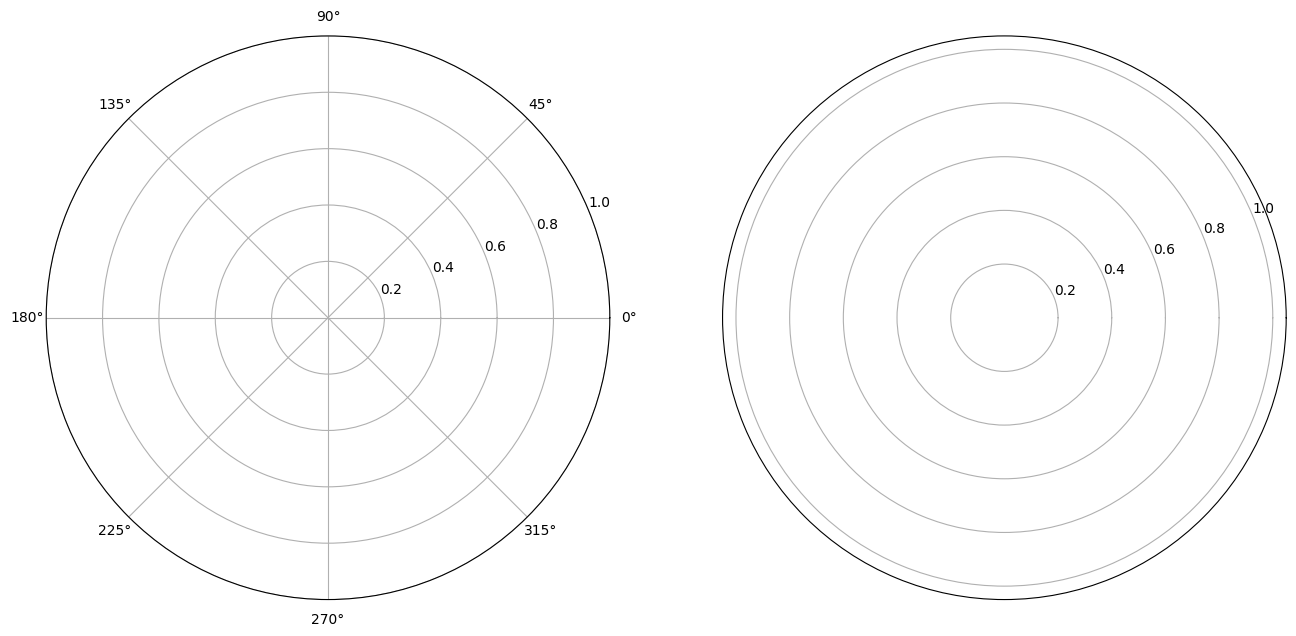

In [112]:
# Define the data for the two time periods
first_year_data = {key: value[:12] for key, value in group_3_data.items()}
second_year_data = {key: value[12:] for key, value in group_3_data.items()}

# Define labels for each period
f1_label = ["April 1854", "May", "June", "July", "August", "September",
            "October", "November", "December", "January", "February", "March 1855"]
f2_label = ["April 1855", "May", "June", "July", "August", "September",
            "October", "November", "December", "January 1856", "February", "March"]

# Set up the figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={"projection": "polar"})

# Function to create a single Nightingale rose chart
def create_nightingale_rose(ax, data, labels):
    df = pd.DataFrame(data)

    # Set the angles for the polar plot
    n_months = len(df)
    angles = np.linspace(0, 2 * np.pi, n_months, endpoint=False)

    sqrt_other = np.sqrt(df['other'])
    sqrt_wound = np.sqrt(df['wound'])
    sqrt_disease = np.sqrt(df['disease'])

    # Set up the bars, stacking them so disease appears on top
    ax.bar(angles, sqrt_other, width=0.525, color='black', alpha=0.5, label='Other causes')
    ax.bar(angles, sqrt_wound, width=0.525, bottom=sqrt_other, color='red', alpha=0.5, label='Wounds')
    ax.bar(angles, sqrt_disease, width=0.525, bottom=sqrt_other + sqrt_wound, color='lightblue', alpha=0.5, label='Disease')

    # Set month labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)

    # Hide the outline and grid
    ax.spines["polar"].set_visible(False)
    ax.grid(False)
    ax.set_yticks([])

    # Add legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Set specific polar plot settings for each subplot
    ax.set_theta_zero_location("W", offset=-15)  # Set west as the starting position
    ax.set_theta_direction(-1)  # Set clockwise direction

# Create the first plot (April 1854 to March 1855)
create_nightingale_rose(ax2, first_year_data, f1_label)
ax1.set_title('April 1854 to March 1855', pad=20)

# Create the second plot (April 1855 to March 1856)
create_nightingale_rose(ax1, second_year_data, f2_label)
ax2.set_title('April 1855 to March 1856', pad=20)

# Set the big title for the entire figure
fig.suptitle('DIAGRAM OF THE CAUSES OR MORTALITY IN THE ARMY IN THE EAST', fontsize=16, y=1.05)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of labels (12).

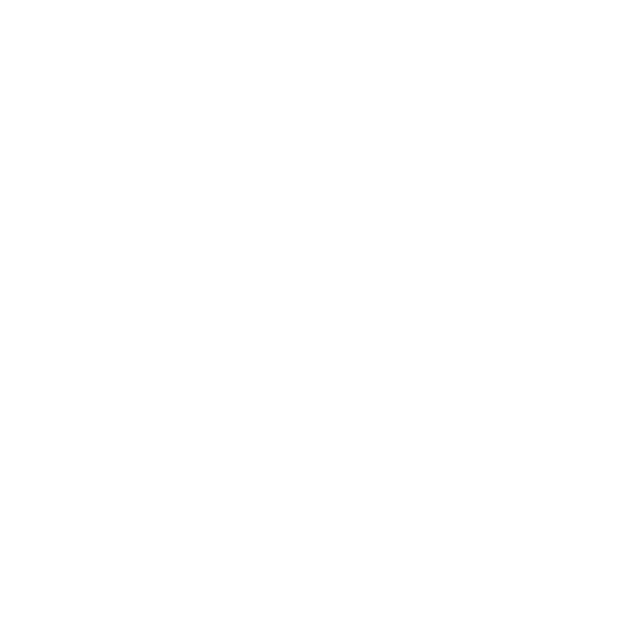

In [95]:
#def create_nightingale_rose(data, title, labels):
    # Convert data dictionary to a DataFrame
    df = pd.DataFrame(data)

    # Set up a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})
    ax.set_theta_zero_location("W", offset=-15)  # Set west as the starting position
    ax.set_theta_direction(-1)  # Set clockwise direction

    # Hide the outline and grid
    ax.spines["polar"].set_visible(False)
    ax.grid(False)
    ax.set_yticks([])

    # Determine number of months
    n_months = len(df)
    # Calculate angular positions
    angles = np.linspace(0, 2 * np.pi, n_months, endpoint=False)

    sqrt_other = np.sqrt(df['other'])
    sqrt_wound = np.sqrt(df['wound'])
    sqrt_disease = np.sqrt(df['disease'])

    # Set up the bars, stacking them so disease appears on top
    ax.bar(angles, sqrt_other, width=0.525, color='black', alpha=0.5, label='Other causes')
    ax.bar(angles, sqrt_wound, width=0.525, bottom=sqrt_other, color='red', alpha=0.5, label='Wounds')
    ax.bar(angles, sqrt_disease, width=0.525, bottom=sqrt_other + sqrt_wound, color='lightblue', alpha=0.5, label='Disease')

    # Set month labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)

    # Add title and legend
    plt.title(title, pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    return fig

# Define labels
f1_label = ["April 1854", "May", "June", "July", "August", "September",
            "October", "November", "December", "January", "February", "March 1855"]
f2_label = ["April 1855", "May", "June", "July", "August", "September",
            "October", "November", "December", "January 1856", "February", "March"]

# Split data into two time periods
first_year_data = {key: value[:12] for key, value in group_3_data.items()}
second_year_data = {key: value[12:] for key, value in group_3_data.items()}

# Generate and display the plots
fig1 = create_nightingale_rose(first_year_data, 'DIAGRAM OF The CAUSES OR MORTALITY IN THE ARMY IN THE EAST\n April 1854 to March 1855', f1_label)
fig2 = create_nightingale_rose(second_year_data, 'DIAGRAM OF The CAUSES OR MORTALITY IN THE ARMY IN THE EAST\n April 1855 to March 1856', f2_label)

plt.show()


**Alternative Visualizations**